# Jest to wersja "step by step"
# Każda linijka będzie opisana komentarzem. 

Powstała ona w celu nauki własnej i lepszego zrozumienia pisanego kodu i operacji wykonywanych na danych


# Predykcja wytrzymałości betonu na ściskanie



Wytrzymałość na ściskanie betonu jest określana zazwyczaj w przedziale od 7 do 28 dni (lub w czasie równoważnym do cementu) wg normy PN-EN 206.

Ze względu na długi czas oczekiwania na wynik a w szczególności w oczekiwaniu na korekty w składzie betonu postanowiłem opracować model uczenia maszynowego którego celem jest określenie wytrzymałości betonu na ściskanie dla różnych składników wejściowych.

Korekty w składzie mieszanki betonowej dokonuje się najczęściej w przypadku niewłaściwej konsystencji mieszanki lub osiągnięcia niewystarczającej wytrzymałości na ściskanie. Dzięki takiemu modelowi będzie można zbadać wpływ poszczególnych skladników na mieszankę betonową a w konsekwencji dobrać ilościowo surowiec w sposób jak najbardziej optymalny 

Wartości zostaną obliczone za pomocą kilku rodzajów modeli w celu wybrania najbardziej optymalnego rozwiązania i miarodajnego rozwiązania

Poniższa baza powstała w zakładzie prefabrykacji podczas zarobów próbnych i testowej produkcji betonu.

Zawiera ona informacje z naważania składników oraz wytrzymałość na ściskanie po określonej ilości dni

W celu zwiększenia ilości próbek w danych wsadowych uwzględniono również wyniki badań kostek "świadków" w wieku od 90 do 365 dni oraz zbiór danych z serwisu kaggle.com


# Importowanie niezbędnych bibliotek

W poniższym kroku zaimportowałem następijące biblioteki:

    a) Pandas - odpowiedzialną za operację na danych
    
    b) Matplotlib - bibliotekę służącą do generowania wykresów
    
    c) Seaborn - bibliotekę, niejako nakładkę na matplotlib która umożliwia rysowanie ładniejszych wykresów i ma wbudowane domyślne wykresy staytstyczne
    
    d) Numpy - biblioteka odpowiedzialna za operacje numeryczne

In [434]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling as pp

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

Wczytanie pliku bazy danych

W poniższym kroku wczytuję dane z pliku .csv
literka "r" przed stringiem oznacza "raw input" przez co nie ma problemów ze znakami ucieczki

In [435]:
path = r"C:\Users\Damian\Desktop\xD\Projekty\concrete-strenght-calculator\concrete.csv" #sciezka do bazy danych

Do zmiennej beton przypisuję obiekt "dataframe" odczytany z pliku .csv za pomocą wbudowanej metody pandasa ".read_csv(ścieżka)"

In [436]:
beton = pd.read_csv(path)

W związku z niewielkim wykorzystaniem wielkopiecowego żużla w receptach wykorzystywanych powszechnie na terenie naszego kraju ze zbioru danych zostanie ten składnik usunięty

Za pomocą metody .drop() usuwam kolumnę z obiektu "data frame". W pierwszym argumencie podaję nazwę koilumny, w następnym wektor (1 oznacza kolumnę a 0 oznacza wiersz i nasępnie argument "inplace" który odpowiada za zastępowanie oviektu. W przypadku braku "inplace = True" należałoby stworzyć osobną zmienną.)

In [437]:
beton.drop("żużel_wielkopiecowy [kg/m3]",1, inplace=True)

C:\Users\Damian\AppData\Local\Temp/ipykernel_17572/2731498070.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  beton.drop("żużel_wielkopiecowy [kg/m3]",1, inplace=True)


Teraz przedstawimy dane wsadowe

metoda .info() przedstawia inforacje o obiekcie dataframe przyisanym wcześniej do zmiennej "beton"

In [438]:
beton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cement [kg/m3]              1030 non-null   float64
 1   popiół_lotny [kg/m3]        1030 non-null   float64
 2   woda [kg/m3]                1030 non-null   float64
 3   superplastyfikator [kg/m3]  1030 non-null   float64
 4   kruszywo_grube [kg/m3]      1030 non-null   float64
 5   kruszywo_drobne [kg/m3]     1030 non-null   float64
 6   wiek [dni]                  1030 non-null   int64  
 7   wytrzymałość [MPa]          1030 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 64.5 KB


W poniższych krokach za pomocą metody .describe() tworzę szybką statystykę moich danych a za pomocą transpozycji transponuję do wygodniejszej formy

In [439]:
opis = beton.describe()
opis.transpose()

,count,mean,std,min,25%,50%,75%,max
cement [kg/m3],1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
popiół_lotny [kg/m3],1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
woda [kg/m3],1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastyfikator [kg/m3],1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
kruszywo_grube [kg/m3],1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
kruszywo_drobne [kg/m3],1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
wiek [dni],1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
wytrzymałość [MPa],1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


Dane nie zawierają wartości pustych. Baza danych jest spójna.
Dodatkowo możemy wywnioskować wzrost wytrzymałości na ściskanie wraz ze wzrostem czasu dojrzewania betonu
Przejdźmy teraz do opracowania wykresów gęstości naszych danych
    

W celu narysowania wykresu gęstości (sns.distplot) tworzę pętlę po wszystkich kolumnach obiektu dataframe (czyli naszej zmiennej beton)

Dla każdej kolumny narysuj wykres gęstości oraz go pokaż.

<Figure size 720x576 with 0 Axes>

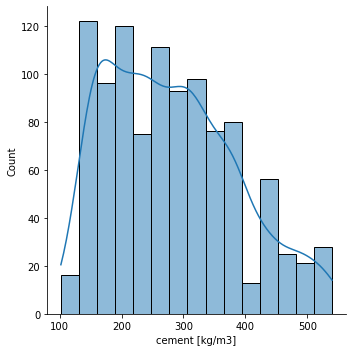

<Figure size 720x576 with 0 Axes>

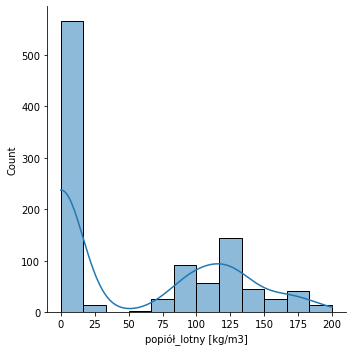

<Figure size 720x576 with 0 Axes>

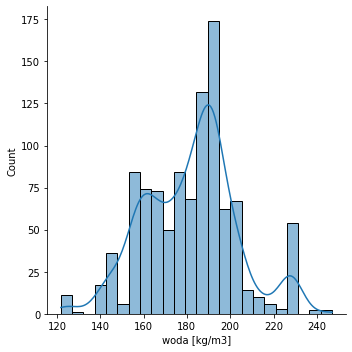

<Figure size 720x576 with 0 Axes>

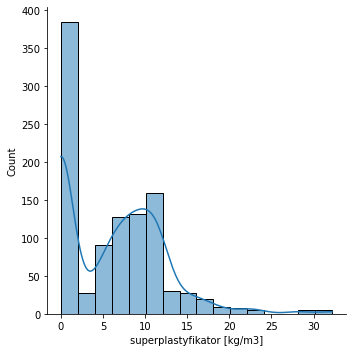

<Figure size 720x576 with 0 Axes>

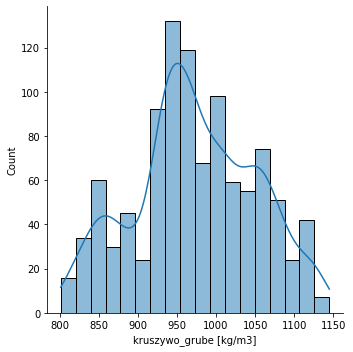

<Figure size 720x576 with 0 Axes>

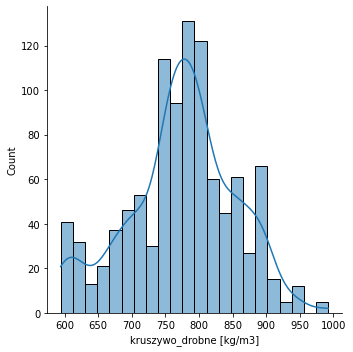

<Figure size 720x576 with 0 Axes>

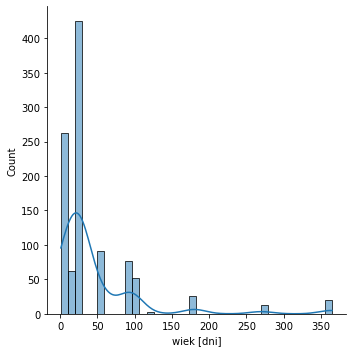

<Figure size 720x576 with 0 Axes>

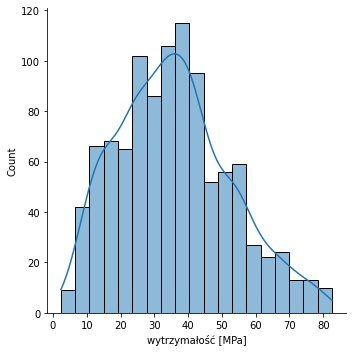

In [440]:
for i in beton.columns:
    plt.figure(figsize=(10,8))
    sns.displot(beton[i], kde=True)
    plt.show()
    
sns.pairplot(beton)



# Wartości odstające

Wartości odstające, których nie daje się wyjaśnić, są zwane wartościami odstającymi. Obserwacje te są niespójne z pozostałymi danymi szeregu i mogą drastycznie wpłynąć na analizę, a w efekcie pogorszyć możliwości prognozowania modelu.

Wartości takie występują powszechnie w szczególności podczas analizy wyników wytrzymałości betonu na rozciąganie przy rozłupywaniu.


Tutaj trochę będzie pisania :)

Definicje:

Kwamtyl - Wartość cechy, która dzieli uporządkowaną zbiorowość statystyczną na dwie części w taki sposób, że 25% jednostek zbiorowości ma wartości cechy mniejsze lub równe wartości kwartyla pierwszego, a 75% jednostek badanej zbiorowości ma wartości cechy większe lub równe wartości kwartyla pierwszego.
Źródło: https://stat.gov.pl/metainformacje/slownik-pojec/pojecia-stosowane-w-statystyce-publicznej/2896,pojecie.html

df.iloc[:] - indeksator oparty na lokalizacji etykiety kolumn. Np beton.iloc[0:3] zwróci nam 3 pierwsze wpisy. df.iloc[:] zwraca nam wszystkie wartości czyli niejako całą tabelę
    
Ogólnie więc w celu policzenia roztępu międzykwantylowego czyli różnicy pomiędzy trzecim kwartylem i pierwszym kwartylem badanej cechy (ponieważ pomiędzy tymi kwartylami znajduje się 50% wszystkich obserwacji, dlatego im większa szerokość rozstępu ćwiartkowego, tym większe zróżnicowanie (miary zróżnicowania) badanej cechy statystycznej w próbie.) należy najpoerw obliczyć pierwszy kwantyl (q1) oraz trzeci kwantyl (q3)

Następnie odejmujemy wartość pierwszego kwantylu (q1) od trzeciego kwantylu (q3)

    


In [ ]:
q1=beton.quantile(0.25) #Pierwszy kwantyl
q3=beton.quantile(0.75) #Trzeci kwantyl
IQR=q3-q1 #Rozstęp międzykwanylowy

print("Pierwszy kwantyl\n----")
print(q1)
print("\nTrzeci kwantyl\n----")
print(q3)
print("\nRozstęp ćwiartkowy\n----")
print(IQR)

Pierwszy kwantyl
----
cement [kg/m3]                192.375
popiół_lotny [kg/m3]            0.000
woda [kg/m3]                  164.900
superplastyfikator [kg/m3]      0.000
kruszywo_grube [kg/m3]        932.000
kruszywo_drobne [kg/m3]       730.950
wiek [dni]                      7.000
wytrzymałość [MPa]             23.710
Name: 0.25, dtype: float64

Trzeci kwantyl
----
cement [kg/m3]                 350.000
popiół_lotny [kg/m3]           118.300
woda [kg/m3]                   192.000
superplastyfikator [kg/m3]      10.200
kruszywo_grube [kg/m3]        1029.400
kruszywo_drobne [kg/m3]        824.000
wiek [dni]                      56.000
wytrzymałość [MPa]              46.135
Name: 0.75, dtype: float64

Rozstęp ćwiartkowy
----
cement [kg/m3]                157.625
popiół_lotny [kg/m3]          118.300
woda [kg/m3]                   27.100
superplastyfikator [kg/m3]     10.200
kruszywo_grube [kg/m3]         97.400
kruszywo_drobne [kg/m3]        93.050
wiek [dni]                     49.

In [ ]:
cwo=((beton.iloc[:] <(q1-1.5*IQR)) | (beton.iloc[:]>(q3+1.5*IQR))).sum(axis=0) # '|' - Operator bitowy

print("\nLiczba kolumn z outlinerami\n----")
print(cwo)


Liczba kolumn z outlinerami
----
cement [kg/m3]                 0
popiół_lotny [kg/m3]           0
woda [kg/m3]                   9
superplastyfikator [kg/m3]    10
kruszywo_grube [kg/m3]         0
kruszywo_drobne [kg/m3]        5
wiek [dni]                    59
wytrzymałość [MPa]             4
dtype: int64


Tworzenie obiektu dataframe do dalszych operacji poprzez stworzenie nowego obiektu dataframe opdf i dodanie nowej kolumny z wartością procentową

In [ ]:
opdf=pd.DataFrame(cwo,index=beton.columns,columns=["Liczba wartości odstających"])
opdf["Procentowa zawartość wartości odstających w danej kolumnie"]=round(opdf["Liczba wartości odstających"]*100/len(beton),2)


In [ ]:
opdf

,Liczba wartości odstających,Procentowa zawartość wartości odstających w danej kolumnie
cement [kg/m3],0,0.00
popiół_lotny [kg/m3],0,0.00
woda [kg/m3],9,0.87
superplastyfikator [kg/m3],10,0.97
kruszywo_grube [kg/m3],0,0.00
kruszywo_drobne [kg/m3],5,0.49
wiek [dni],59,5.73
wytrzymałość [MPa],4,0.39


W tym kroku robimy funkcję która zwraca nam 1 jeżeli dana wartość jest w poza kwantylem a 0 jeżeli się mieści w przedziale

In [ ]:
rwo=(((beton[:]<(q1-1.5*IQR))|(beton[:]>(q3+1.5*IQR))).sum(axis=1))
rwo

0       0
1       0
2       0
3       0
4       0
       ..
1025    0
1026    1
1027    0
1028    1
1029    0
Length: 1030, dtype: int64

Teraz wyprintujemy ilość wartości odstających

In [ ]:
print(rwo.sum())

87


Teraz liczymy jaki procent jest w danych wierszach odstających wartości. 

In [ ]:
ro005=(((rwo/len(beton.columns))<0.05).sum())*100/len(beton)
ro01=(((rwo/len(beton.columns))<0.1).sum())*100/len(beton)
ro015=(((rwo/len(beton.columns))<0.15).sum())*100/len(beton)
ro02=(((rwo/len(beton.columns))<0.2).sum())*100/len(beton)
ro025=(((rwo/len(beton.columns))<0.25).sum())*100/len(beton)
ro03=(((rwo/len(beton.columns))<0.30).sum())*100/len(beton)
ro035=(((rwo/len(beton.columns))<=0.35).sum())*100/len(beton)
ro04=(((rwo/len(beton.columns))<=0.4).sum())*100/len(beton)
ro045=(((rwo/len(beton.columns))<=0.45).sum())*100/len(beton)
ro05=(((rwo/len(beton.columns))<=0.50).sum())*100/len(beton)
ro055=(((rwo/len(beton.columns))<0.55).sum())*100/len(beton)
ro06=(((rwo/len(beton.columns))<0.6+0).sum())*100/len(beton)
ro=pd.DataFrame(np.round([ro005,ro01,ro015,ro02,ro025,ro03,ro035,ro04,ro045,ro05,ro055,ro06],2),
             index=['5%','10%','15%','20%','25%','30%','35%','40%','45%','50%','55%','60%'],
            columns=['% Data'])
ro.index.name='% Wartości odstających w danym wierszu'

ro

,% Data
% Wartości odstających w danym wierszu,
5%,91.55
10%,91.55
15%,100.00
20%,100.00
25%,100.00
30%,100.00
35%,100.00
40%,100.00
45%,100.00


W każdym wierszu nie występuje więcej niż 10% wartości odstających. W związku z tym nieliczne wartości odstające zostaną potraktowane przy użyciu metody MICE (Multiple Imputation using Chained Equations) po przekształceniu tych wartości odstających na wartości NaN.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
imp = IterativeImputer()
imp.fit(beton)
beton=pd.DataFrame(imp.transform(beton),columns=beton.columns)

Można więc zauważyć, że wszystkie wartości odstające zostały usunięte poprzez przekształcenie ich na wartości NaN i imputację przy użyciu MICE.

In [ ]:
beton.isnull().sum()

cement [kg/m3]                0
popiół_lotny [kg/m3]          0
woda [kg/m3]                  0
superplastyfikator [kg/m3]    0
kruszywo_grube [kg/m3]        0
kruszywo_drobne [kg/m3]       0
wiek [dni]                    0
wytrzymałość [MPa]            0
dtype: int64

In [ ]:
g=beton.groupby("wiek [dni]")
g1=g.get_group(1)
g3=g.get_group(3)
g7=g.get_group(7)
g14=g.get_group(14)
g28=g.get_group(28)
pd.DataFrame(round(g28.iloc[:,-1].sort_values()).unique(),columns=["wytrzymałość_na_ściskanie [MPa]"])

,wytrzymałość_na_ściskanie [MPa]
0,9.0
1,10.0
2,11.0
3,12.0
4,13.0
...,...
62,75.0
63,76.0
64,79.0
65,80.0


In [ ]:
beton.corr()

,cement [kg/m3],popiół_lotny [kg/m3],woda [kg/m3],superplastyfikator [kg/m3],kruszywo_grube [kg/m3],kruszywo_drobne [kg/m3],wiek [dni],wytrzymałość [MPa]
cement [kg/m3],1.000000,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
popiół_lotny [kg/m3],-0.397467,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
woda [kg/m3],-0.081587,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastyfikator [kg/m3],0.092386,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
kruszywo_grube [kg/m3],-0.109349,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
kruszywo_drobne [kg/m3],-0.222718,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
wiek [dni],0.081946,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
wytrzymałość [MPa],0.497832,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


[]

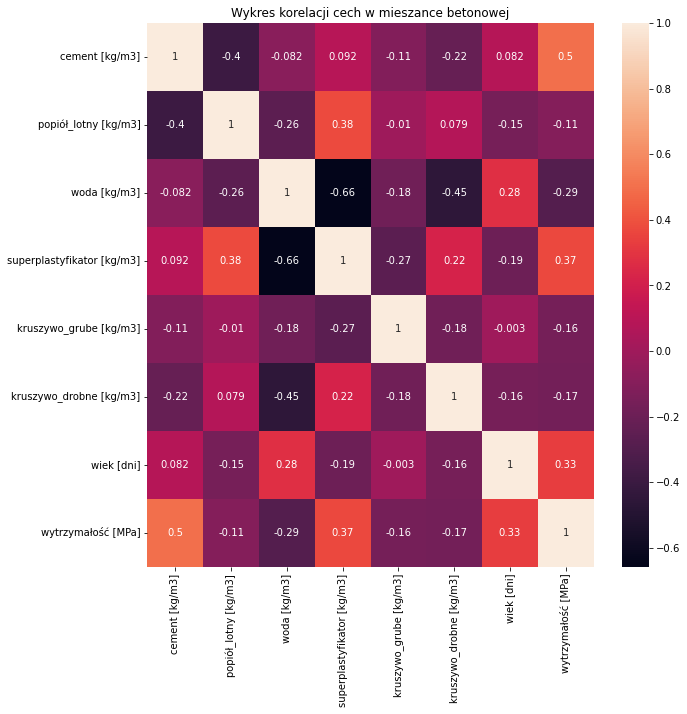

In [393]:

plt.figure(figsize=(10,10))
plt.title("Wykres korelacji cech w mieszance betonowej")
sns.heatmap(beton.corr(),annot=True)
plt.plot()

Z powyższego wykresu możemy wywnioskować dodatnią korelację pomiędzy wytrzymałością na ściskanie a zawartością cementu, superplastyfikatora.

Dodatkowo możemy zaobserować spadek ilości wody przy zastosowaniu superplastyfikatora co potwierdza prawidłowość naszych danych.

Nie mniej jednak żadna z cech nie jest silnie skorelowana ani skorelowana ze zmienną docelową (0,7<|r|≤0,9)


# Regresja liniowa

In [394]:
import statsmodels.api as sm
col = int(len(beton.columns))
col -= 1

Przygotowanie danych. W pierwszej kolejności należy przygotować dane na podstawie których będziemy przewidywać wytrzymałość betonu na ściskanie. 

In [395]:
X=beton.iloc[:,:col] #Zwracam zakres kolumn w obiekcie DataFrame czyli od 1 kolumny do 7 (Do wieku. Ostatnią przewiduję)
X

,cement [kg/m3],popiół_lotny [kg/m3],woda [kg/m3],superplastyfikator [kg/m3],kruszywo_grube [kg/m3],kruszywo_drobne [kg/m3],wiek [dni]
0,141.3,0.0,203.5,0.0,971.8,748.5,28.0
1,168.9,124.3,158.3,10.8,1080.8,796.2,14.0
2,250.0,95.7,187.4,5.5,956.9,861.2,28.0
3,266.0,0.0,228.0,0.0,932.0,670.0,28.0
4,154.8,0.0,193.3,9.1,1047.4,696.7,28.0
...,...,...,...,...,...,...,...
1025,135.0,166.0,180.0,10.0,961.0,805.0,28.0
1026,531.3,0.0,141.8,28.2,852.1,893.7,3.0
1027,276.4,90.3,179.6,8.9,870.1,768.3,28.0
1028,342.0,0.0,228.0,0.0,932.0,670.0,270.0


Przygotowanie danych. W następnej kolejności należy przygotować dane które będziemy przewidywać. 

In [396]:
Y=beton.iloc[:,col] #Zwracam jedną kolumne (1 wymiar) dla danych które chcę przewidywać czyli ostatnią kolumnę
Y

0       29.89
1       23.51
2       29.22
3       45.85
4       18.29
        ...  
1025    13.29
1026    41.30
1027    44.28
1028    55.06
1029    52.61
Name: wytrzymałość [MPa], Length: 1030, dtype: float64

In [397]:
ls=sm.OLS(Y,sm.add_constant(X))
wynik=ls.fit()
wynik.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     wytrzymałość [MPa]   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     198.3
Date:                Fri, 18 Mar 2022   Prob (F-statistic):          1.79e-185
Time:                        10:50:46   Log-Likelihood:                -3919.4
No. Observations:                1030   AIC:                             7855.
Df Residuals:                    1022   BIC:                             7894.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        210.4226     14.333     14.681      0.000     182.298     238.547
cement [kg/m3]                 0.0424      0.004     10.420      0.000       0.034       0.050
popiół_lotny [kg/m3]          -0.0237      0.007     -3.583      0.000      -0.037      -0.011
woda [kg/m3]                  -0.4287      0.031    -13.811      0.000      -0.490      -0.368
superplastyfikator [kg/m3]     0.2824      0.098      2.880      0.004       0.090       0.475
kruszywo_grube [kg/m3]        -0.0584      0.006     -9.774      0.000      -0.070      -0.047
kruszywo_drobne [kg/m3]       -0.0740      0.006    -12.864      0.000      -0.085      -0.063
wiek [dni]                     0.1080      0.006     19.080      0.000       0.097       0.119
==============================================================================
Omnibus:                        0.940   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.625   Jarque-Bera (JB):                0.971
Skew:                          -0.073   Prob(JB):                        0.615
Kurtosis:                       2.962   Cond. No.                     5.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Uwagi:

[1] Błędy standardowe zakładają, że macierz kowariancji błędów jest poprawnie określona.

[2] Liczba warunkowa jest duża - 5,44e+04. Może to oznaczać, że występuje śilna wieloliniowość lub inne problemy numeryczne.

Widzimy, że składnik stały ma wartość P większą od 0,05, czyli od założonego poziomu istotności, dlatego usuwamy składnik stały z modelowania.


In [398]:
ls=sm.OLS(Y,X)
wynik=ls.fit()
wynik.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     wytrzymałość [MPa]   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                              1448.
Date:                Fri, 18 Mar 2022   Prob (F-statistic):                        0.00
Time:                        10:50:47   Log-Likelihood:                         -4017.9
No. Observations:                1030   AIC:                                      8050.
Df Residuals:                    1023   BIC:                                      8084.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
cement [kg/m3]                 0.0686      0.004     17.026      0.000       0.061       0.076
popiół_lotny [kg/m3]          -0.0096      0.007     -1.330      0.184      -0.024       0.005
woda [kg/m3]                  -0.0240      0.016     -1.530      0.126      -0.055       0.007
superplastyfikator [kg/m3]     1.1976      0.083     14.384      0.000       1.034       1.361
kruszywo_grube [kg/m3]         0.0157      0.004      4.475      0.000       0.009       0.023
kruszywo_drobne [kg/m3]       -0.0078      0.004     -1.981      0.048      -0.015   -7.16e-05
wiek [dni]                     0.1001      0.006     16.155      0.000       0.088       0.112
==============================================================================
Omnibus:                        6.692   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                6.775
Skew:                           0.197   Prob(JB):                       0.0338
Kurtosis:                       2.953   Cond. No.                         288.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Uwagi:

[1] R² oblicza się bez wypośrodkowania (niewypośrodkowane), ponieważ model nie zawiera stałej.

[2] Błędy standardowe zakładają, że macierz kowariancji błędów jest prawidłowo określona.

In [399]:
X_train,X_test,y_train,y_test = train_test_split(X, Y, random_state=150, test_size=0.3 )


In [400]:
X_train

,cement [kg/m3],popiół_lotny [kg/m3],woda [kg/m3],superplastyfikator [kg/m3],kruszywo_grube [kg/m3],kruszywo_drobne [kg/m3],wiek [dni]
1012,296.0,0.0,192.0,0.0,1085.0,765.0,90.0
276,166.0,0.0,183.0,13.0,859.0,827.0,28.0
236,213.7,24.5,181.7,6.9,1065.8,785.4,3.0
537,387.0,94.0,157.0,13.9,938.0,845.0,56.0
494,277.2,24.5,160.7,11.2,1061.7,782.5,3.0
...,...,...,...,...,...,...,...
764,151.0,185.0,167.0,16.0,1074.0,678.0,28.0
306,198.6,0.0,192.0,0.0,978.4,825.5,90.0
496,218.9,124.1,158.5,11.3,1078.7,794.9,100.0
25,310.0,0.0,168.0,10.0,914.0,804.0,28.0


In [401]:
X_test

,cement [kg/m3],popiół_lotny [kg/m3],woda [kg/m3],superplastyfikator [kg/m3],kruszywo_grube [kg/m3],kruszywo_drobne [kg/m3],wiek [dni]
926,475.0,0.0,181.1,8.9,852.1,781.5,7.0
58,295.7,95.6,171.5,8.9,955.1,859.2,14.0
225,313.3,113.0,178.5,8.0,1001.9,688.7,28.0
381,194.7,100.5,165.6,7.5,1006.4,905.9,28.0
461,334.0,158.0,189.0,15.3,967.0,633.0,28.0
...,...,...,...,...,...,...,...
224,220.8,0.0,185.7,0.0,1055.0,744.3,28.0
513,164.0,200.0,181.0,13.0,849.0,846.0,28.0
162,349.0,0.0,192.0,0.0,1047.0,806.0,7.0
462,168.0,163.8,121.8,5.7,1058.7,780.1,100.0


In [402]:
y_train

1012    29.39
276     37.91
236     18.00
537     47.97
494     30.45
        ...  
764     13.46
306     38.07
496     46.23
25      45.30
442     35.75
Name: wytrzymałość [MPa], Length: 721, dtype: float64

In [403]:
y_test

926    55.60
58     35.23
225    36.80
381    25.72
461    44.33
       ...  
224    25.75
513    15.09
162    18.13
462    39.23
874    41.10
Name: wytrzymałość [MPa], Length: 309, dtype: float64

In [404]:
lr=LinearRegression()

lr.fit(X_train,y_train)
z = lr.predict(X_train.iloc[[2],:]) #Przykład dla jakiejś tablicy.
z[0]

22.57194060247849

In [405]:
X_train.iloc[[2],:]

,cement [kg/m3],popiół_lotny [kg/m3],woda [kg/m3],superplastyfikator [kg/m3],kruszywo_grube [kg/m3],kruszywo_drobne [kg/m3],wiek [dni]
236,213.7,24.5,181.7,6.9,1065.8,785.4,3.0


In [406]:
X_train.iloc[0,2]/X_train.iloc[0,0] # Obliczanie stosunku wodno-cementowego informacyjnie w sumie

0.6486486486486487

In [407]:
print('Ocena modelu: ',lr.score(X_train,y_train))
y_pred_lrtr=lr.predict(X_train)
y_pred_lrte=lr.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error

print('Ocena modelu treningowego R2 : ',r2_score(y_train,y_pred_lrtr))
print('Ocena modelu testowego R2 : ',r2_score(y_test,y_pred_lrte))

Ocena modelu:  0.5821942883266018
Ocena modelu treningowego R2 :  0.5821942883266018
Ocena modelu testowego R2 :  0.555794911722028


In [408]:
lr.score(X_train,y_train) == r2_score(y_train,y_pred_lrtr)

True

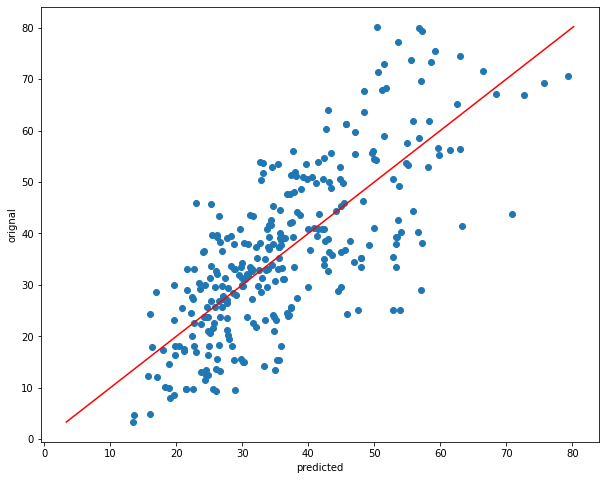

In [409]:
plt.figure(figsize=(10,8))
plt.scatter(y_pred_lrte,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

# Przykład predykcji wytrzymałości na ściskanie dla pożiszych danych wejściowych

Poniżej przedstawiono predykcję na podstawie przykładowych danych losowo wybranych. 

In [410]:
X_train.iloc[[23],:]

,cement [kg/m3],popiół_lotny [kg/m3],woda [kg/m3],superplastyfikator [kg/m3],kruszywo_grube [kg/m3],kruszywo_drobne [kg/m3],wiek [dni]
23,132.0,161.0,179.0,5.0,867.0,736.0,28.0


In [411]:
beton.loc[23,:]

cement [kg/m3]                132.0
popiół_lotny [kg/m3]          161.0
woda [kg/m3]                  179.0
superplastyfikator [kg/m3]      5.0
kruszywo_grube [kg/m3]        867.0
kruszywo_drobne [kg/m3]       736.0
wiek [dni]                     28.0
wytrzymałość [MPa]             33.3
Name: 23, dtype: float64

In [412]:
z = lr.predict(X_train.iloc[[23],:]) #Przykład dla jakiejś tablicy.
z[0]

35.023954611129

Wytrzymałość prognozowana po 28 dniach wyniosła 35 MPa a rzeczywista 33,3 MPa. Różnica jest dosyć nie wielka nie mniej jednak sam algorytm regresji nie jest idealny ponieważ model ma tendencję do zawyżania wyników wytrzymałości na ściskanie

Poniżej znajdują się różne rozwiązania za pomocą bardziej zaawansowanych algorytmów uczenia maszynowego. Work in progress


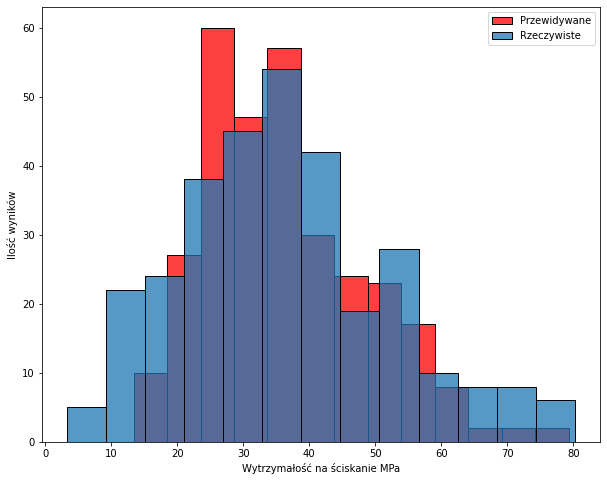

In [413]:
plt.figure(figsize=(10,8))
plt.xlabel('Wytrzymałość na ściskanie MPa')
plt.ylabel('Ilość wyników')
sns.histplot(y_pred_lrte,label="Przewidywane",color="red")
sns.histplot(y_test,label="Rzeczywiste")
plt.legend()

# STOP

## Poniżej znajdują się bardziej zaawansowane rozwiązania - Work in progresss

In [414]:
pf = PolynomialFeatures(degree = 2)
X_polytr = pf.fit_transform(X_train)
lr.fit(X_polytr,y_train)
y_pred_lr2tr = lr.predict(X_polytr)
print("Training R2 - degree 2 polynomial: ",r2_score(y_train, y_pred_lr2tr ))
X_polyte = pf.fit_transform(X_test)
y_pred_lr2te= lr.predict(X_polyte)
print("Test R2 - degree 2 polynomial: ",r2_score(y_test,y_pred_lr2te))

Training R2 - degree 2 polynomial:  0.7981287036274147
Test R2 - degree 2 polynomial:  0.729897038820154


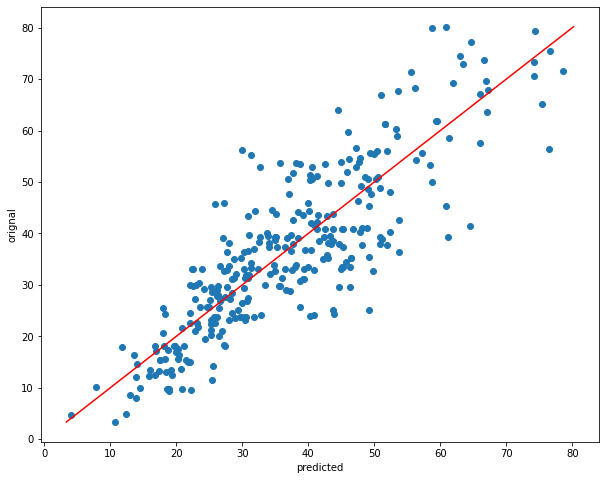

In [415]:
plt.figure(figsize=(10,8))
plt.scatter(y_pred_lr2te,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

In [416]:
pf = PolynomialFeatures(degree = 3)
X_polytr = pf.fit_transform(X_train)
lr.fit(X_polytr,y_train)
y_pred_lr2tr = lr.predict(X_polytr)
print("Training R2 - degree 2 polynomial: ",r2_score(y_train, y_pred_lr2tr ))
X_polyte = pf.fit_transform(X_test)
y_pred_lr2te= lr.predict(X_polyte)
print("Test R2 - degree 2 polynomial: ",r2_score(y_test,y_pred_lr2te))

Training R2 - degree 2 polynomial:  0.7187399722961141
Test R2 - degree 2 polynomial:  0.5634374675223472


In [417]:
X_train.iloc[[2],:]

,cement [kg/m3],popiół_lotny [kg/m3],woda [kg/m3],superplastyfikator [kg/m3],kruszywo_grube [kg/m3],kruszywo_drobne [kg/m3],wiek [dni]
236,213.7,24.5,181.7,6.9,1065.8,785.4,3.0


In [418]:
przyklad = pf.fit_transform(X_train.iloc[[2],:])
z = lr.predict(przyklad) #Przykład dla jakiejś tablicy.
z[0]


15.567306832410395

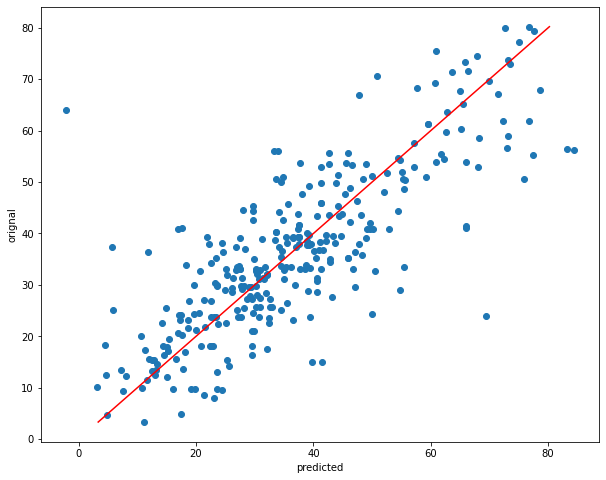

In [419]:
plt.figure(figsize=(10,8))
plt.scatter(y_pred_lr2te,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

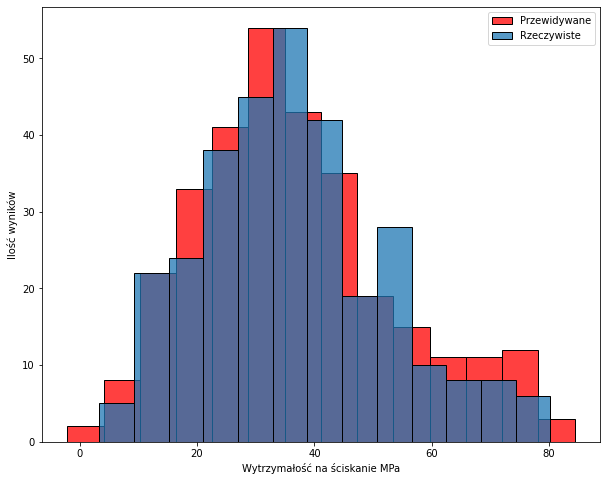

In [420]:
plt.figure(figsize=(10,8))
plt.xlabel('Wytrzymałość na ściskanie MPa')
plt.ylabel('Ilość wyników')
sns.histplot(y_pred_lr2te,label="Przewidywane",color="red")
sns.histplot(y_test,label="Rzeczywiste")
plt.legend()

In [421]:
pf = PolynomialFeatures(degree = 4)
X_polytr = pf.fit_transform(X_train)
lr.fit(X_polytr,y_train)
y_pred_lr2tr = lr.predict(X_polytr)
print("Training R2 - degree 2 polynomial: ",r2_score(y_train, y_pred_lr2tr ))
X_polyte = pf.fit_transform(X_test)
y_pred_lr2te= lr.predict(X_polyte)
print("Test R2 - degree 2 polynomial: ",r2_score(y_test,y_pred_lr2te))

Training R2 - degree 2 polynomial:  0.9669278530480343
Test R2 - degree 2 polynomial:  0.5060788523530988


In [422]:
X_train.iloc[[2],:]

,cement [kg/m3],popiół_lotny [kg/m3],woda [kg/m3],superplastyfikator [kg/m3],kruszywo_grube [kg/m3],kruszywo_drobne [kg/m3],wiek [dni]
236,213.7,24.5,181.7,6.9,1065.8,785.4,3.0


In [423]:
przyklad = pf.fit_transform(X_train.iloc[[2],:])
z = lr.predict(przyklad) #Przykład dla jakiejś tablicy.
z[0]

12.8745368765085

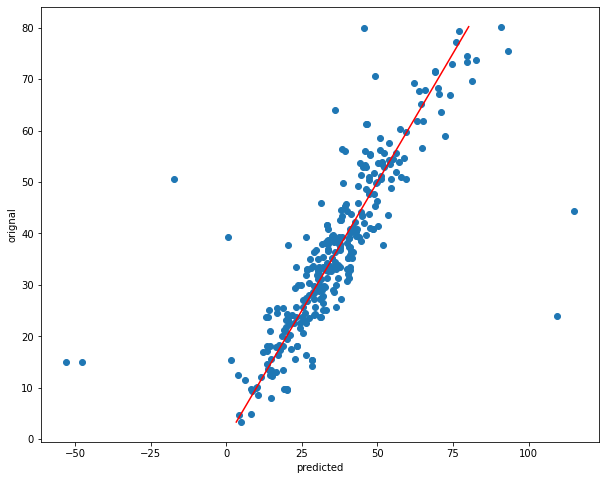

In [424]:
plt.figure(figsize=(10,8))
plt.scatter(y_pred_lr2te,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

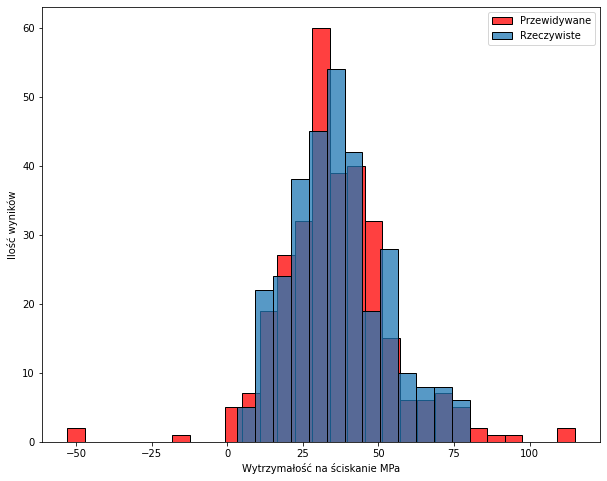

In [425]:
plt.figure(figsize=(10,8))
plt.xlabel('Wytrzymałość na ściskanie MPa')
plt.ylabel('Ilość wyników')
sns.histplot(y_pred_lr2te,label="Przewidywane",color="red")
sns.histplot(y_test,label="Rzeczywiste")
plt.legend()

In [426]:
from sklearn.tree import DecisionTreeRegressor

In [427]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
y_pred_dttr=dt.predict(X_train)
y_pred_dtte=dt.predict(X_test)
print('Train R2 score: ',r2_score(y_train,y_pred_dttr))
print('Test R2 score: ',r2_score(y_test,y_pred_dtte))

Train R2 score:  0.9955427325403053
Test R2 score:  0.7414199585279997


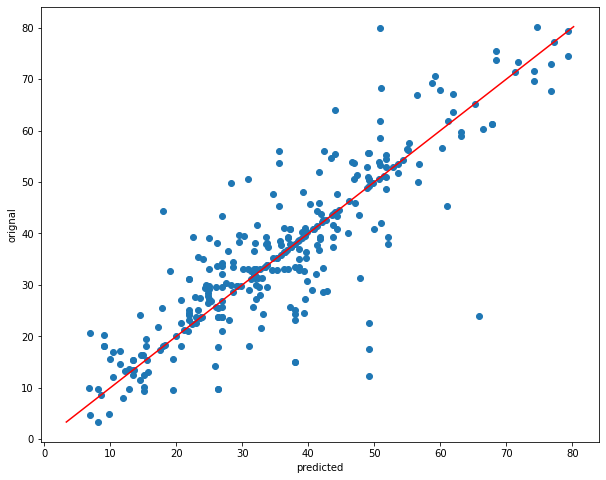

In [428]:
plt.figure(figsize=(10,8))
plt.scatter(y_pred_dtte,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

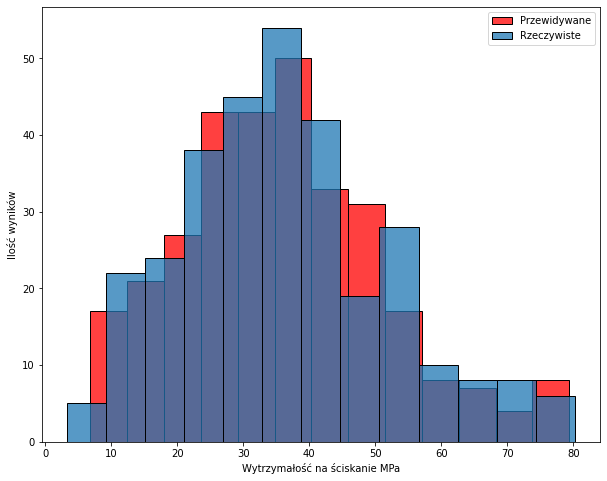

In [429]:
plt.figure(figsize=(10,8))
plt.xlabel('Wytrzymałość na ściskanie MPa')
plt.ylabel('Ilość wyników')
sns.histplot(y_pred_dtte,label="Przewidywane",color="red")
sns.histplot(y_test,label="Rzeczywiste")
plt.legend()

In [430]:
przyklad = X_test.iloc[[2],:]
walidacja = y_test.iloc[2]
z = dt.predict(przyklad) #Przykład dla jakiejś tablicy.
z[0]

36.8

In [431]:
walidacja

36.8

In [432]:
przyklad

,cement [kg/m3],popiół_lotny [kg/m3],woda [kg/m3],superplastyfikator [kg/m3],kruszywo_grube [kg/m3],kruszywo_drobne [kg/m3],wiek [dni]
225,313.3,113.0,178.5,8.0,1001.9,688.7,28.0


In [433]:
beton.loc[225,:]

cement [kg/m3]                 313.3
popiół_lotny [kg/m3]           113.0
woda [kg/m3]                   178.5
superplastyfikator [kg/m3]       8.0
kruszywo_grube [kg/m3]        1001.9
kruszywo_drobne [kg/m3]        688.7
wiek [dni]                      28.0
wytrzymałość [MPa]              36.8
Name: 225, dtype: float64